[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91703\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


SVM Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

     neutral       1.00      1.00      1.00     32596

    accuracy                           1.00     32596
   macro avg       1.00      1.00      1.00     32596
weighted avg       1.00      1.00      1.00     32596



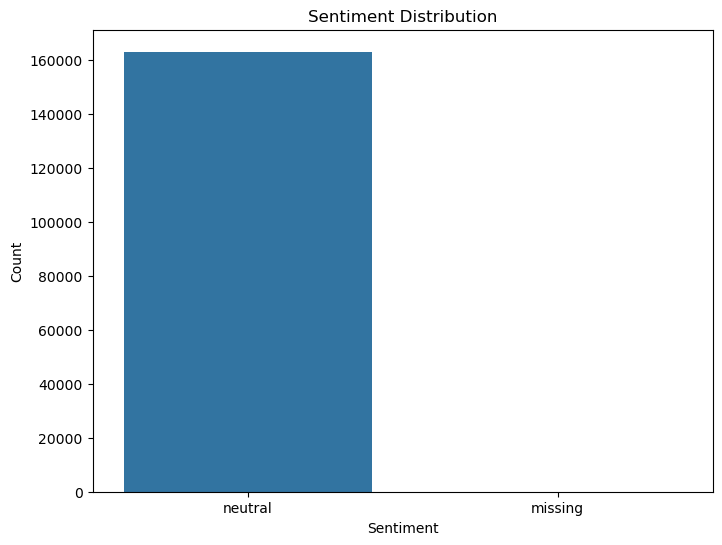

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Download NLTK resource
nltk.download('punkt')

# Load Airbnb data
data = pd.read_csv(r'D:\Python\archive (5)\Twitter_Data.csv')

# Sentiment Analysis
def classify_sentiment(text):
    if isinstance(text, str):  # Check if text is a string
        # Example logic:
        if "positive_word" in text:
            return 'positive'
        elif "negative_word" in text:
            return 'negative'
        else:
            return 'neutral'
    else:
        return 'missing'  # Handle missing values

# Example sentiment analysis using 'clean_text' column
data['sentiment'] = data['clean_text'].apply(lambda x: classify_sentiment(x))

# Tokenization using NLTK
data['tokens'] = data['clean_text'].apply(lambda x: word_tokenize(str(x)))

# Machine Learning Algorithms
X_train, X_test, y_train, y_test = train_test_split(data['tokens'], data['sentiment'], test_size=0.2, random_state=42)

# Join tokens into strings
X_train_str = X_train.apply(lambda x: ' '.join(x))
X_test_str = X_test.apply(lambda x: ' '.join(x))

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_features_train = tfidf_vectorizer.fit_transform(X_train_str)
tfidf_features_test = tfidf_vectorizer.transform(X_test_str)

# Train SVM model
svm = SVC(kernel='linear')
svm.fit(tfidf_features_train, y_train)

# Make predictions
svm_preds = svm.predict(tfidf_features_test)

# Evaluate SVM model
svm_accuracy = accuracy_score(y_test, svm_preds)
print("SVM Accuracy:", svm_accuracy)
print("Classification Report:\n", classification_report(y_test, svm_preds))

# Data Visualization
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

C:\Users\91703\AppData\Local\Temp\ipykernel_23068\1085269031.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['category'])


<Axes: xlabel='category', ylabel='Density'>

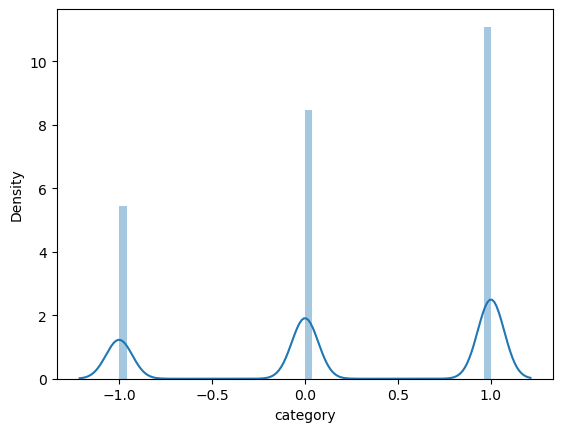

In [6]:
sns.distplot(data['category'])

<Axes: >

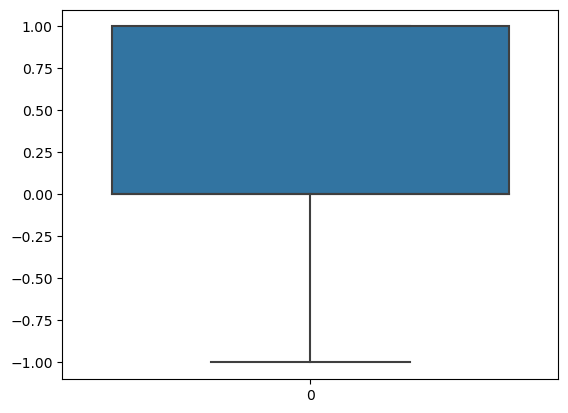

In [8]:
sns.boxplot(data['category'])